In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import odeint
from scipy import fftpack

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

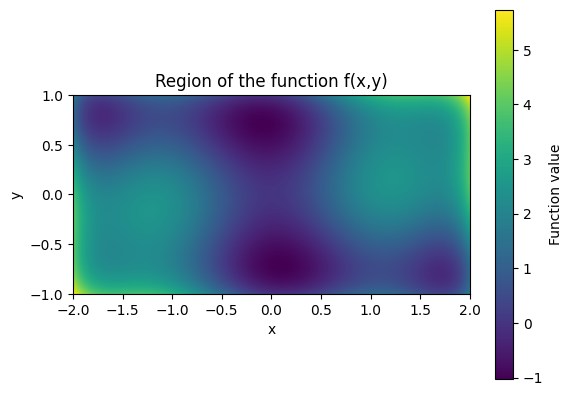

MINIMUN :
	- Point: (X = -1.7036067179866117, Y = 0.7960835818801775) => Value : -0.21546382438371692
	- Point: (X = 0.08984203338873575, Y = -0.7126564272279498) => Value : -1.0316284534898714
	- Point: (X = -0.08984204618626519, Y = 0.7126564139167026) => Value : -1.0316284534898725
	- Point: (X = 1.7036067024557484, Y = -0.7960835960593623) => Value : -0.21546382438370915


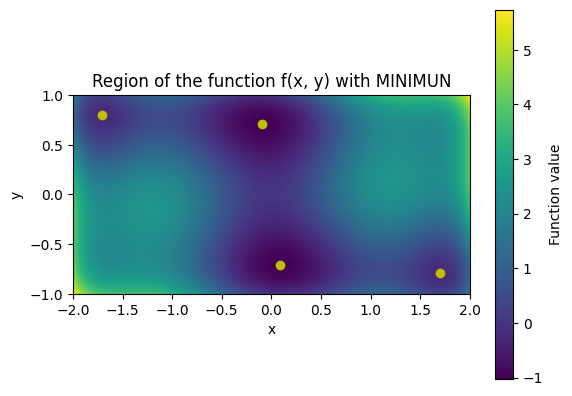

For (x, y) = (0, 0), we have : 
	- Point: (X = 0.0, Y = 0.0) => Value : 0.0


In [2]:
# Define the function f(x, y)
def f(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4) * x[1]**2

# Variables can be restricted to -2 < x < 2 and -1 < y < 1
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 1, 400)

# Use numpy.meshgrid() and pylab.imshow() to graphically display the regions.
X, Y = np.meshgrid(x, y)

plt.imshow(f([X, Y]), extent = [round(x.min()), round(x.max()), round(y.min()), round(y.max())], origin='lower') 
plt.colorbar(label='Function value') 
plt.xlabel("x")
plt.ylabel("y")
plt.title('Region of the function f(x,y)')
plt.show()

# Thanks to this graph, we can see that there are 4 possible minimun, corresponding to the dark blue color
# We thus have 4 cooridinates which can be possible solutions: (-1.8, 0.8), (0, -0.80), (0, 0.80), (1.8, -0.8)

# Use `scipy.optimize.minimize()`, trying its optional arguments.
from scipy.optimize import minimize
    
x0 = [(-1.8, 0.8), (0, -0.80), (0, 0.80), (1.8, -0.8)]
minimun = []

for sol in x0 :
    res = minimize(f, sol)
    if res.success:
        minimun.append((res.x, res.fun))

# Results
print("MINIMUN :")
for point, value in minimun:
    print(f"\t- Point: (X = {point[0]}, Y = {point[1]}) => Value : {value}")


# Plotting the function and the minimun results
plt.imshow(f([X, Y]), extent = [round(x.min()), round(x.max()), round(y.min()), round(y.max())], origin='lower') 
plt.colorbar(label='Function value') 
plt.xlabel("x")
plt.ylabel("y")
plt.title('Region of the function f(x, y) with MINIMUN')

for point, value in minimun:
    plt.scatter(point[0], point[1], color = 'y', marker='o')

plt.show()

# What happens for an initial guess of (x,y) = (0,0) ?

# Initial guess of (x, y) = (0, 0)
initial_guess = (0, 0)
result = minimize(f, initial_guess)

print(f"For (x, y) = (0, 0), we have : \n\t- Point: (X = {result.x[0]}, Y = {result.x[1]}) => Value : {result.fun}")


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

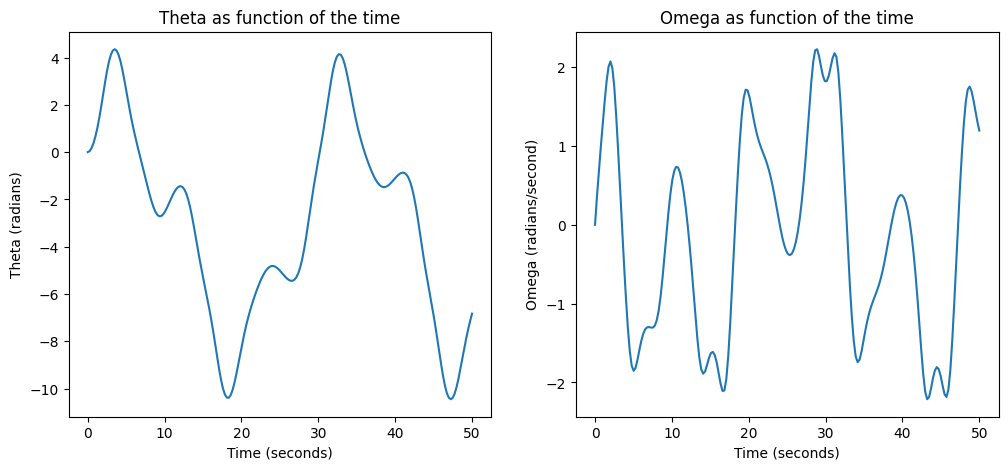

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
l = 10
Q = 2.0
d = 1.5
w = 0.65
g = 9.81

# Initial conditions
theta0 = 0.0
omega0 = 0.0
Xinit = [theta0, omega0]

def derivative(X, time, l, Q, d, w, g):
    return np.array([X[1], -X[1]/Q + (g/l)*np.sin(X[0]) + d*np.cos(w*time)])

t = np.linspace(0, 50, 200)  # 200 time steps
X = odeint(derivative, Xinit, t, args = (l, Q, d, w, g))

# Extract solutions
theta, omega = X.T

# Plotting
plt.figure(figsize=(12, 5))

# Theta vs Time
plt.subplot(1, 2, 1)
plt.plot(t, theta)
plt.title('Theta as function of the time')
plt.xlabel('Time (seconds)')
plt.ylabel('Theta (radians)')

# Omega vs Time
plt.subplot(1, 2, 2)
plt.plot(t, omega)
plt.title('Omega as function of the time')
plt.xlabel('Time (seconds)')
plt.ylabel('Omega (radians/second)')

plt.show()


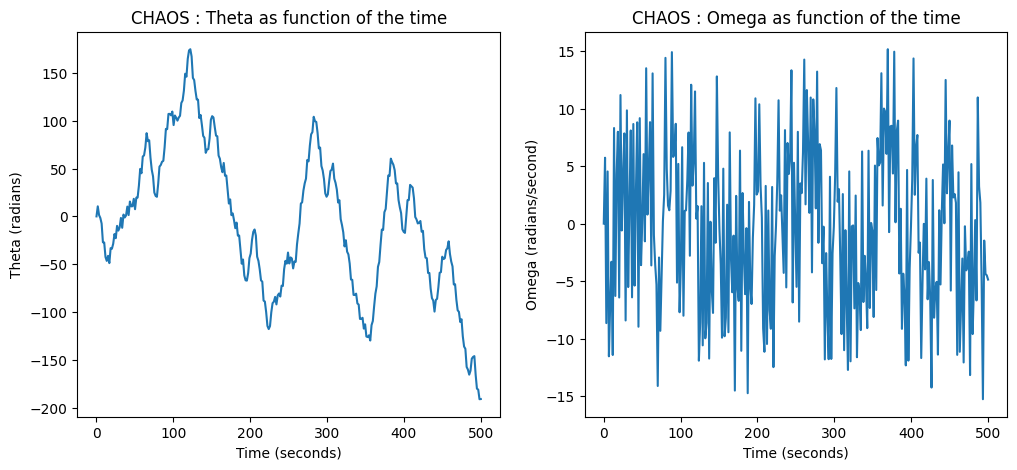

In [4]:
# Optional : determine if there is a set of parameters for which the motion is chaotic.

Q_chaos = 0.001
d_chaos = 1.5
w_chaos = 0.01

# Time points for a longer duration to observe chaotic behavior
t_chaos = np.linspace(0, 500, 300)

# Solve the ODE with chaotic parameters
solution_chaos = odeint(derivative, Xinit, t_chaos, args=(Q_chaos, g, l, d_chaos, w_chaos))

# Extracting theta and omega for chaotic parameters
theta_chaos = solution_chaos[:, 0]
omega_chaos = solution_chaos[:, 1]

# Plotting for chaotic behavior
plt.figure(figsize=(12, 5))

# Theta vs Time
plt.subplot(1, 2, 1)
plt.plot(t_chaos, theta_chaos)
plt.title('CHAOS : Theta as function of the time')
plt.xlabel('Time (seconds)')
plt.ylabel('Theta (radians)')

# Omega vs Time
plt.subplot(1, 2, 2)
plt.plot(t_chaos, omega_chaos)
plt.title('CHAOS : Omega as function of the time')
plt.xlabel('Time (seconds)')
plt.ylabel('Omega (radians/second)')

plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [5]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

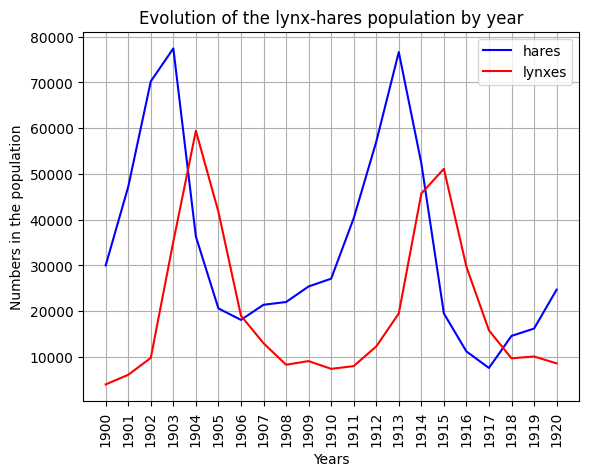

In [6]:
X = np.loadtxt("./data/populations.txt")

year, hares, lynxes, carrots = X[:,0], X[:,1], X[:,2], X[:,3]

plt.plot(year, hares, color = "blue", label = "hares")
plt.plot(year, lynxes, color = "red", label = "lynxes")
plt.title("Evolution of the lynx-hares population by year")
plt.xlabel("Years")
plt.ylabel("Numbers in the population")
plt.xticks(year, rotation=90)
plt.grid()
plt.legend()
plt.show()

- We can see that for the hares, the population peaks in 1903 and reaches a new peak in 1913. So, the periodicity of the hares population is 10 years.

- We can see that for lynxes, the population peaks in 1904 and reaches a new peak in 1914. So, the periodicity of the lynx population is therefore 10 years.


# For the hares :

Peak frequency : 0.1


Text(0, 0.5, 'Power')

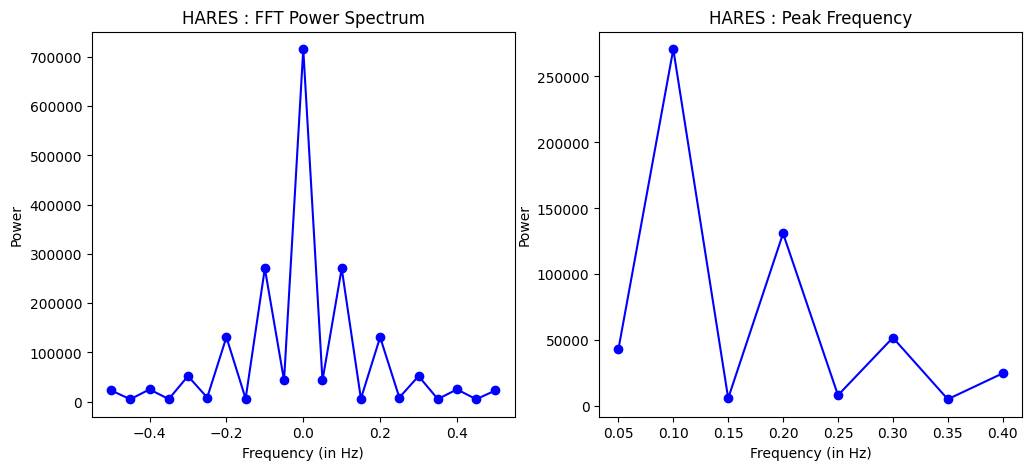

In [7]:
# The FFT of the hares
hares_fft = fftpack.fft(hares)

# The power of the hares => we have complex dtype sso we use np.abs()
hares_power = np.abs(hares_fft)

# The frequencies of the hares
hares_sample_freq = fftpack.fftfreq(hares.size, d = (year[len(year)-1]-year[0])/len(year))

# We sort the results on the two data according to the indices
x = np.argsort(hares_sample_freq)
hares_sample_freq = hares_sample_freq[x]
hares_power = hares_power[x]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Plot the FFT power
ax[0].plot(hares_sample_freq, hares_power, 'bo-')
ax[0].set_xlabel("Frequency (in Hz)")
ax[0].set_ylabel("Power")
ax[0].set_title("HARES : FFT Power Spectrum")


# -----

# Find the peak frequency : focus only on only the positive frequencies
pos_mask = np.where(hares_sample_freq > 0)
freqs = hares_sample_freq[pos_mask]
powes = hares_power[pos_mask]

# Find the max of freqs array
peak_freq = freqs[powes.argmax()]
print(f"Peak frequency : {peak_freq}")

# Plot for the peak frequency
ax[1].plot(freqs[:8], powes[:8], 'bo-')
ax[1].set_title("HARES : Peak Frequency")
ax[1].set_xlabel("Frequency (in Hz)")
ax[1].set_ylabel("Power")

#### Results

To determine the period of the population cycles, we take the inverse of the frequency of the dominant peak, without taking the fundamental into account.  

Here, the peak frequency is 0.1 Hz, so the cycle period is 1 / 0.1 = 10 years.

This confirms the 10-year periodicity we predicted for this population.

# LYNXES

Peak frequency : 0.1


Text(0, 0.5, 'Power')

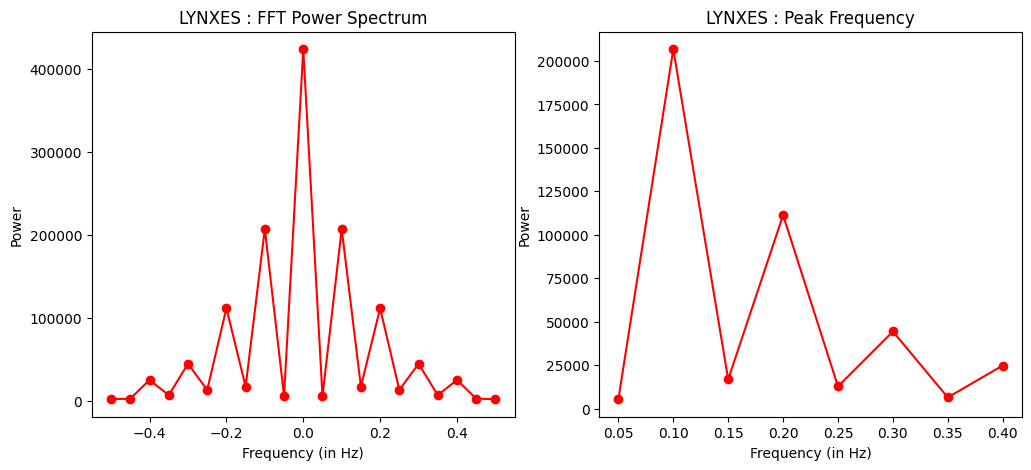

In [8]:
# The FFT of the lynxes
lynxes_fft = fftpack.fft(lynxes)

# The power of the lynxes => we have complex dtype sso we use np.abs()
lynxes_power = np.abs(lynxes_fft)

# The frequencies of the lynxes
lynxes_sample_freq = fftpack.fftfreq(lynxes.size, d = (year[len(year)-1]-year[0])/len(year))

# We sort the results on the two data according to the indices
x = np.argsort(lynxes_sample_freq)
lynxes_sample_freq = lynxes_sample_freq[x]
lynxes_power = lynxes_power[x]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Plot the FFT power
ax[0].plot(lynxes_sample_freq, lynxes_power, 'ro-')
ax[0].set_xlabel("Frequency (in Hz)")
ax[0].set_ylabel("Power")
ax[0].set_title("LYNXES : FFT Power Spectrum")


# -----

# Find the peak frequency : focus only on only the positive frequencies
pos_mask = np.where(lynxes_sample_freq > 0)
freqs = lynxes_sample_freq[pos_mask]
powes = lynxes_power[pos_mask]

# Find the max of freqs array
peak_freq = freqs[powes.argmax()]
print(f"Peak frequency : {peak_freq}")

# Plot for the peak frequency
ax[1].plot(freqs[:8], powes[:8], 'ro-')
ax[1].set_title("LYNXES : Peak Frequency")
ax[1].set_xlabel("Frequency (in Hz)")
ax[1].set_ylabel("Power")

#### Results

To determine the period of the population cycles, we take the inverse of the frequency of the dominant peak, without taking the fundamental into account.  

Here, the peak frequency is 0.1 Hz, so the cycle period is 1 / 0.1 = 10 years.

This confirms the 10-year periodicity we predicted for this population.

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Original Image of MOONLANDING.PNG')

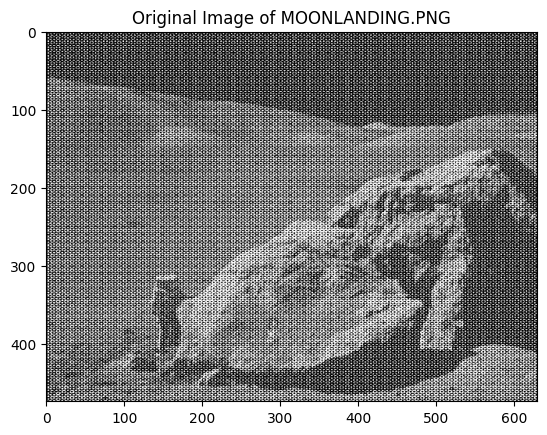

In [9]:
from IPython.display import Image
Image("./data/moonlanding.png")

image = plt.imread('./data/moonlanding.png')
plt.imshow(image, cmap='gray')
plt.title("Original Image of MOONLANDING.PNG")

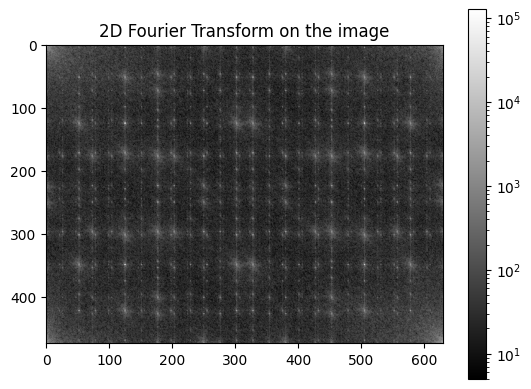

In [10]:
from matplotlib.colors import LogNorm

# 2D Fourier transform of the image
image_fft = fftpack.fft2(image)

# Plot the 2D Fourier transform
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5), cmap='gray')
plt.colorbar()
plt.title("2D Fourier Transform on the image")
plt.show()

Text(0, 0.5, 'Power')

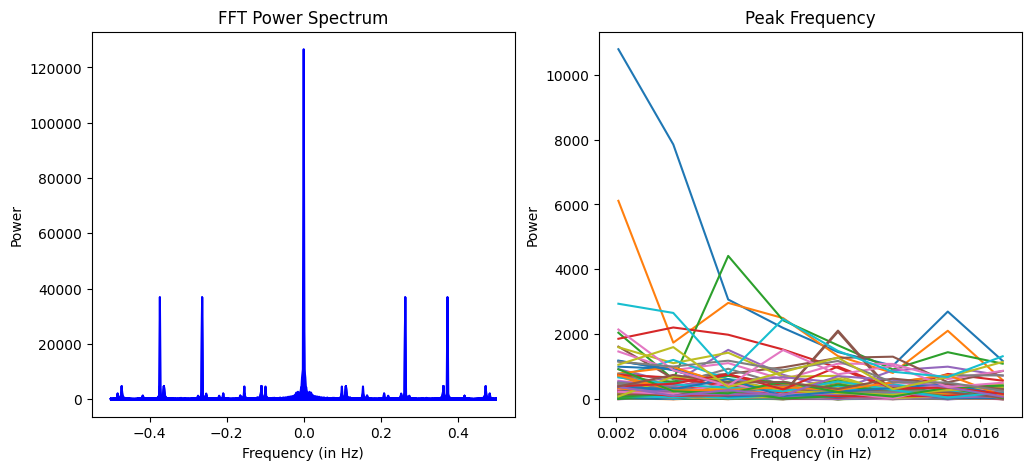

In [11]:
# The 2D FFT of the image
image_fft = fftpack.fft2(image)

# The power of the image => we have complex dtype sso we use np.abs()
image_power = np.abs(image_fft)

# The frequencies of the lynxes
image_sample_freq = fftpack.fftfreq(len(image_fft))

# We sort the results on the two data according to the indices
x = np.argsort(image_sample_freq)
image_sample_freq = image_sample_freq[x]
image_power = image_power[x]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Plot the FFT power
ax[0].plot(image_sample_freq, image_power, 'b')
ax[0].set_xlabel("Frequency (in Hz)")
ax[0].set_ylabel("Power")
ax[0].set_title("FFT Power Spectrum")


# -----

# Find the peak frequency : focus only on only the positive frequencies
pos_mask = np.where(image_sample_freq > 0)
freqs = image_sample_freq[pos_mask]
powes = image_power[pos_mask]

# Plot for the peak frequency
ax[1].plot(freqs[:8], powes[:8])
ax[1].set_title("Peak Frequency")
ax[1].set_xlabel("Frequency (in Hz)")
ax[1].set_ylabel("Power")

(0.0, 1000.0)

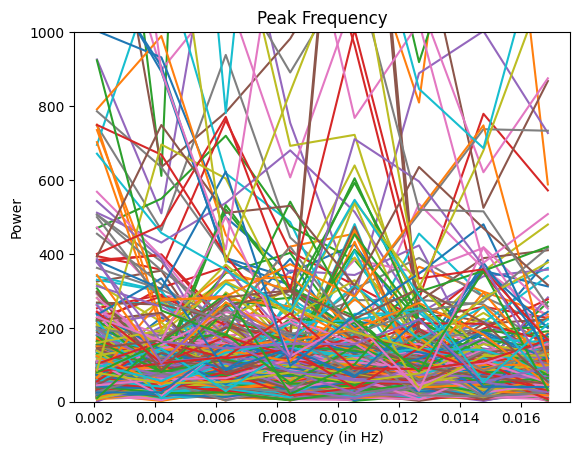

In [12]:
# Plot for the peak frequency focus on 0 < y < 1000
plt.plot(freqs[:8], powes[:8])
plt.title("Peak Frequency")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Power")
plt.ylim(0, 1000)

The observation reveals that the peaks with high frequencies are indicative of noise. When examining the frequency domain on the y-axis, it becomes apparent that the crucial components of the image predominantly reside within the [0, 1000] frequency range.

So, to diminish noise while retaining the image's fundamental elements, we will eliminate all frequency components exceeding this specified range.

In [13]:
# Components with a peak frequency greater than 1000 Hz are suppressed.
image_fft[abs(image_fft) > 1000] = 0

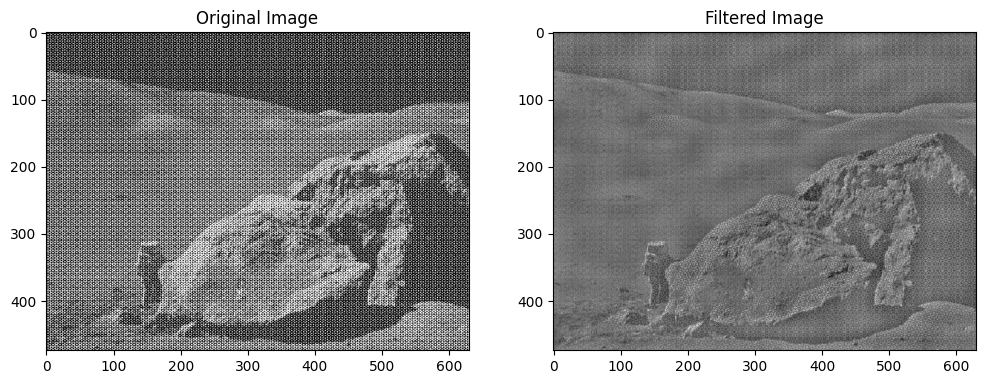

In [14]:
# The filtered image is obtained using ifft2
filtered_image = fftpack.ifft2(image_fft).real

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")

# Display filtered image
ax[1].imshow(filtered_image, cmap='gray')
ax[1].set_title("Filtered Image")

plt.show()